# Adaptive Exponential Integrate and Fire Model


In [2]:
from brian2 import *

The two differential equaltions for the adaptive integrate model

In [3]:
eqs = '''
dv/dt = -v/(10*ms) : volt
dvt/dt = (10*mV-vt)/(15*ms) : volt
'''

The reset values for the neurons


In [4]:
reset = '''
v = 0*mV
vt += 3*mV
'''

My Neurone Groupe


In [5]:
my_neurone_groupe = NeuronGroup(1,eqs,method="euler",reset = reset,threshold='v>vt')
my_neurone_groupe.vt = 10 *mV


Poisson


In [6]:
poisson_group_neurones = PoissonGroup(10, 500*Hz)


Synaptic Connections

In [7]:
synaptic_connections = Synapses(
    poisson_group_neurones, my_neurone_groupe, on_pre='v+=3*mV')
synaptic_connections.connect()


WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


State Monitor

In [8]:
mV_1 = StateMonitor(my_neurone_groupe,'v',record=True)
MvT = StateMonitor(my_neurone_groupe,'vt',record=True)

In [9]:
My_Spike_Monitor = SpikeMonitor(my_neurone_groupe,variables='v')
run(2*second,report='text')

Starting simulation at t=0. s for a duration of 2. s
2. s (100%) simulated in < 1s


Plotting

Text(0.5, 0, 'time (ms)')

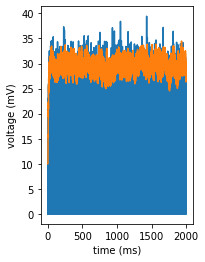

In [10]:

subplot(1,2,1)
plot(mV_1.t/ms,mV_1[0].v/mV)
plot(MvT.t/ms,MvT[0].vt/mV)
ylabel('voltage (mV)')
xlabel('time (ms)')




First 100ms


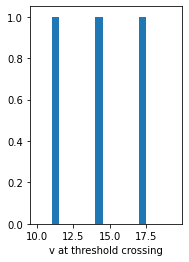

In [11]:
xlim(0,100)
subplot(1,2,2)
hist(My_Spike_Monitor.v/mV,bins=np.arange(10,20,0.5))
xlabel('v at threshold crossing')
show()